In [12]:
# --- Importaciones ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# --- Cargar datos del Dataset Breast Cancer ---
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target



In [13]:
# --- NumPy: Estadísticas básicas ---
# Crear un array manual con np.array
mean_radius = np.array(df['mean radius'])
# Calcular media, mediana, desviación típica de una columna del dataset
print("Media de radio medio:", np.mean(mean_radius))
print("Desviación típica:", np.std(mean_radius))
print("Mediana:", np.median(mean_radius))

Media de radio medio: 14.127291739894552
Desviación típica: 3.520950760711062
Mediana: 13.37


In [15]:
# --- Pandas: Exploración ---
# Devolver las primeras n filas (por defecto, n=5)
print(df.head())
# Generar estadísticas
print(df.describe())
# Filtrar por clase
print("\nFiltrado por clase 0 (malignant):")
print(df[df["target"] == 0])
# Agrupar por clase y hacer media
print("\nMedia por clase:")
print(df.groupby("target").mean())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

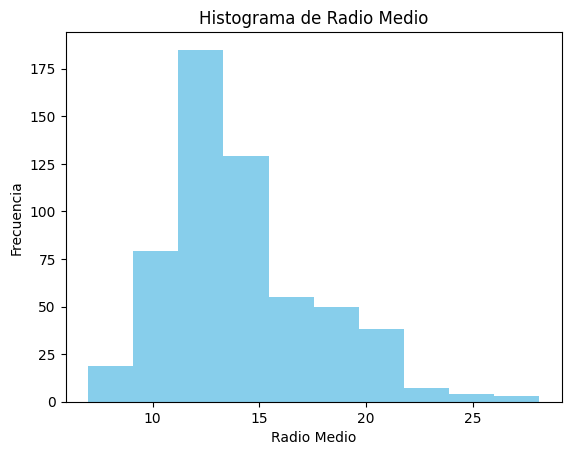

In [4]:
# --- Matplotlib: Visualizaciones ---
# Histograma
plt.hist(df['mean radius'], bins=10, color='skyblue')
plt.title('Histograma de Radio Medio')
plt.xlabel('Radio Medio')
plt.ylabel('Frecuencia')
plt.show()

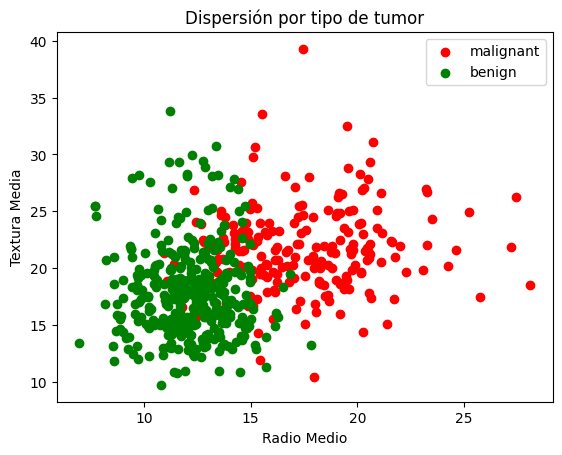

In [5]:
# Scatter plot
colors = ['red', 'green']
for i in range(2):
    plt.scatter(df[df['target'] == i]['mean radius'],
                df[df['target'] == i]['mean texture'],
                label=cancer.target_names[i], color=colors[i])
plt.xlabel('Radio Medio')
plt.ylabel('Textura Media')
plt.title('Dispersión por tipo de tumor')
plt.legend()
plt.show()

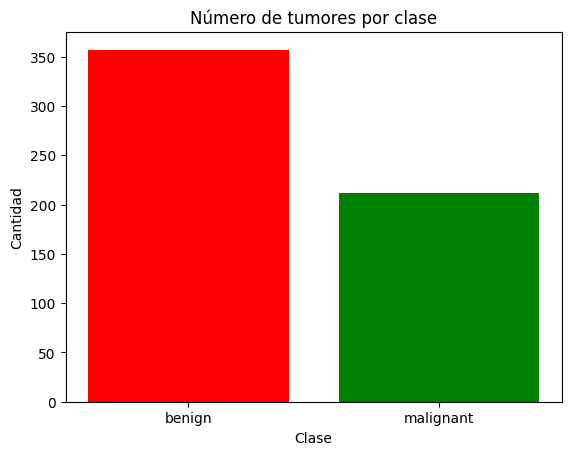

In [6]:
# Gráfico de barras
counts = df['target'].value_counts()
labels = [cancer.target_names[i] for i in counts.index]

plt.bar(labels, counts, color=['red', 'green'])
plt.title('Número de tumores por clase')
plt.ylabel('Cantidad')
plt.xlabel('Clase')
plt.show()

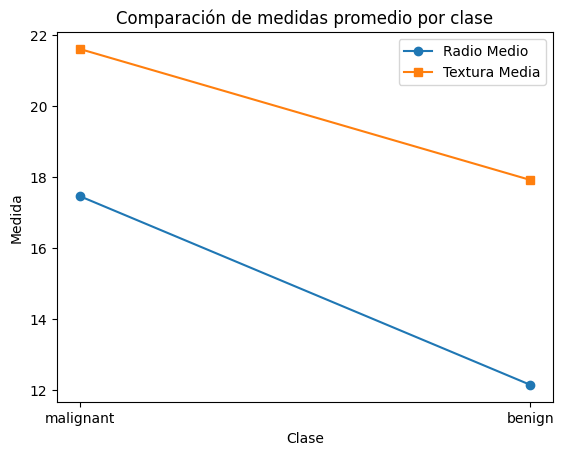

In [7]:
# Gráfico de líneas
grouped_means = df.groupby('target')[['mean radius', 'mean texture']].mean()
labels = [cancer.target_names[i] for i in grouped_means.index]

plt.plot(labels, grouped_means['mean radius'], label='Radio Medio', marker='o')
plt.plot(labels, grouped_means['mean texture'], label='Textura Media', marker='s')
plt.title('Comparación de medidas promedio por clase')
plt.ylabel('Medida')
plt.xlabel('Clase')
plt.legend()
plt.show()

C:\Users\Fernando Pinilla\AppData\Local\Temp\ipykernel_8012\1358665188.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=cancer.target_names)


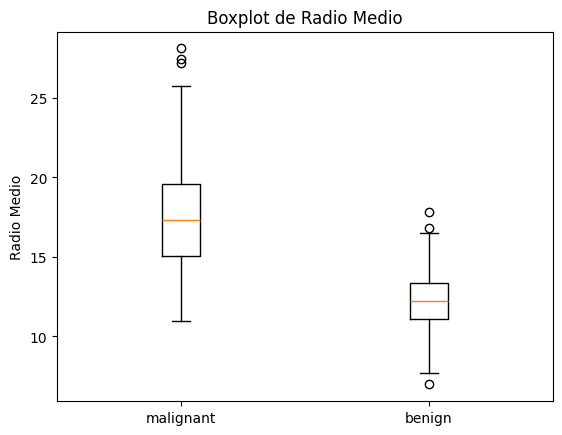

In [8]:
# Boxplot
data = [df[df['target'] == i]['mean radius'] for i in range(2)]
plt.boxplot(data, labels=cancer.target_names)
plt.title('Boxplot de Radio Medio')
plt.ylabel('Radio Medio')
plt.show()

In [10]:
# --- Scikit-learn: Modelo simple ---
X = df.drop("target", axis=1)
y = df["target"]
# Dividir conjunto de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Usar un modelo de aprendizaje supervisado
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
# Evaluar el rendimiento del modelo
y_pred = model.predict(X_test)
print("\nPrecisión del modelo:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Precisión del modelo: 0.9473684210526315

Matriz de confusión:
[[40  3]
 [ 3 68]]
